# **Task 1: EDA and Business Insights**



**Step 1: Load the Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display first few rows to check the data
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

**Step 2: Check for Missing Values and Basic Info**

In [ ]:
# Check missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Basic information
print(customers.info())
print(products.info())
print(transactions.info())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2

There are no null values present in the given datasets. So, we don't need to work upon null values.

**Step 3: Merge Datasets**

In [ ]:
# Merge datasets
merged = transactions.merge(customers, on='CustomerID', how='left')
merged = merged.merge(products, on='ProductID', how='left')

print(merged.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

**Step 4: Perform EDA**

1. Sales Trends Over Time

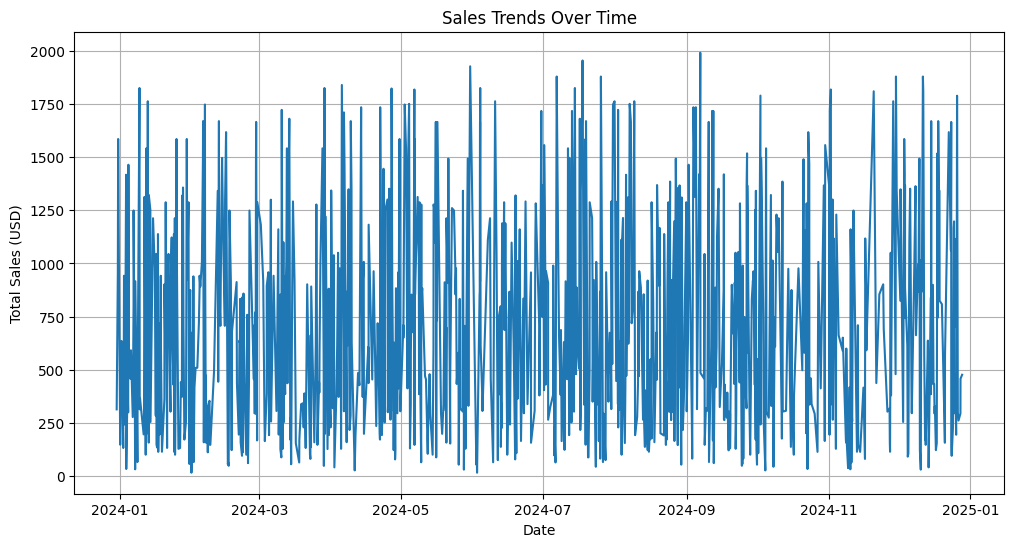

In [ ]:
# Convert dates to datetime format
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])
merged['SignupDate'] = pd.to_datetime(merged['SignupDate'])

# Group by date for sales trends
sales_trends = merged.groupby('TransactionDate')['TotalValue'].sum().reset_index()

# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(sales_trends['TransactionDate'], sales_trends['TotalValue'])
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.grid(True)
plt.show()

2. Top Products by Revenue

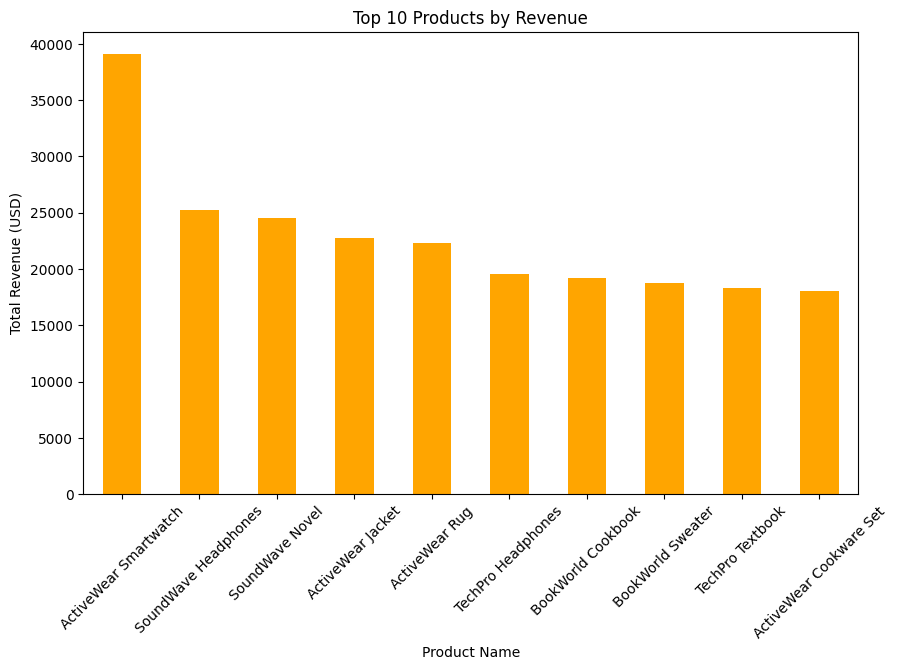

In [10]:
top_products = merged.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Bar plot
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Total Revenue (USD)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

3. Customer Distribution by Region

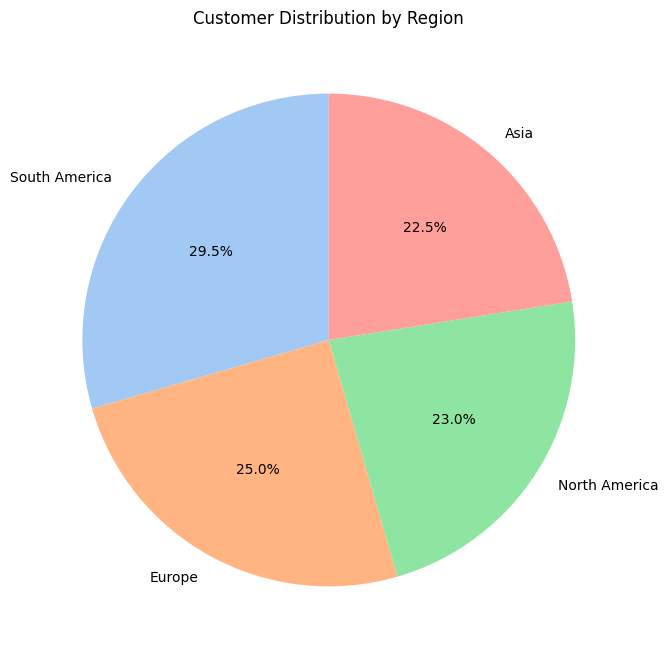

In [ ]:
region_distribution = customers['Region'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
region_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Region')
plt.ylabel('')
plt.show()

4. Lifetime Value (LTV) per Customer

<Figure size 1000x600 with 0 Axes>

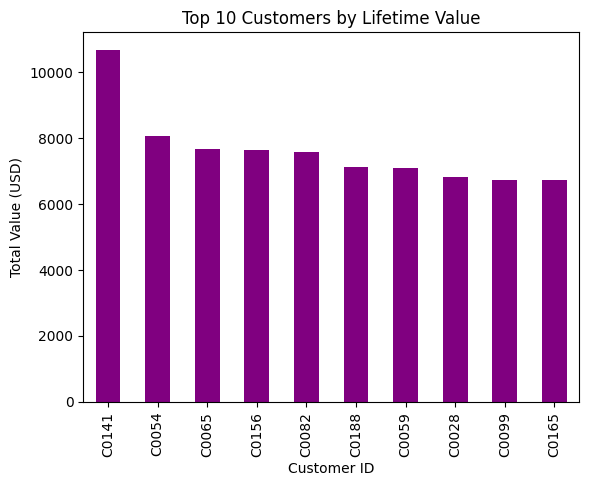

In [ ]:
# Aggregate total spending per customer
ltv = merged.groupby('CustomerID')['TotalValue'].sum().reset_index().sort_values(by='TotalValue', ascending=False)

# Bar plot for top customers
plt.figure(figsize=(10, 6))
ltv.head(10).plot(x='CustomerID', y='TotalValue', kind='bar', color='purple', legend=False)
plt.title('Top 10 Customers by Lifetime Value')
plt.ylabel('Total Value (USD)')
plt.xlabel('Customer ID')
plt.show()

Step 5: Derive Business Insights
In your PDF report, summarize the following (example insights):

1. Top-Performing Products: Highlight which products or categories bring the
highest revenue.
2. Regional Performance: Identify which regions drive the most sales, highlighting potential untapped areas.
3. High-Value Customers: Emphasize the importance of retaining the top customers contributing most to revenue.
4. Signup Patterns: Examine whether signup dates correlate with transaction frequency.
5. Product Pricing Strategy: Discuss how certain product categories are performing and where pricing strategies could be adjusted.